# Part1: Data wrangling for files describing the Pacific and Atlantic hurricane tracks

We will be using the data files presented by the Department of the Interior of US Geological Survey, that describe the tracks of historic hurricanes originated in Pacific and Atlantic oceans. The datasets were downloaded from the webpages:

https://catalog.data.gov/dataset/historical-north-atlantic-tropical-cyclone-tracks-1851-2004-direct-download

https://catalog.data.gov/dataset/historical-eastern-north-pacific-tropical-cyclone-tracks-1949-2004-direct-download

We first import all necessary modules including the .dbf file reader DBF5 to obtain the Pacific and Atlantic hurricane tracks dataframes.

In [2]:
# import the .dbf file reader
from simpledbf import Dbf5

import pandas as pd
import numpy as np

import gpxpy.geo


We then read the tracks files into the dataframes df_Atl and df_Pac. Running .info() indicates that these files contain no missing values.

In [584]:
# Pacific hurricanes

dbf1 = Dbf5('phralll020.dbf')
df_Pac = dbf1.to_dataframe()

df_Pac.head(10)
#df_Pac.tail(20)
#df_Pac.info()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,PHRALLL020,YEAR,MONTH,DAY,BTID,NAME,LONG,LAT,WIND_KTS,PRESSURE,WIND_MPH,CATEGORY
0,0,0,0,0,0.099999,1,1949,6,11,1,NOT NAMED,-106.3,20.2,45.0,0,50.0,TS
1,0,0,0,0,0.299995,2,1949,6,11,1,NOT NAMED,-106.4,20.2,45.0,0,50.0,TS
2,0,0,0,0,1.004990,3,1949,6,11,1,NOT NAMED,-106.7,20.2,45.0,0,50.0,TS
3,0,0,0,0,0.905540,4,1949,6,11,1,NOT NAMED,-107.7,20.3,45.0,0,50.0,TS
4,0,0,0,0,0.806229,5,1949,6,12,1,NOT NAMED,-108.6,20.4,45.0,0,50.0,TS
5,0,0,0,0,0.806221,6,1949,6,12,1,NOT NAMED,-109.4,20.5,45.0,0,50.0,TS
6,0,0,0,0,0.000107,7,1949,6,12,1,NOT NAMED,-110.2,20.6,45.0,0,50.0,TS
7,0,0,0,0,0.860230,8,1949,6,17,2,NOT NAMED,-107.0,14.1,45.0,0,50.0,TS
8,0,0,0,0,0.806230,9,1949,6,17,2,NOT NAMED,-107.7,14.6,45.0,0,50.0,TS
9,0,0,0,0,0.894423,10,1949,6,18,2,NOT NAMED,-108.4,15.0,45.0,0,50.0,TS


In [585]:
# Atlantic hurricanes

dbf2 = Dbf5('huralll020.dbf')
df_Atl = dbf2.to_dataframe()

df_Atl.head(10)
#df_Atl.tail(20)
#df_Atl.info()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,HURALLL020,YEAR,MONTH,DAY,BTID,NAME,LONG,LAT,WIND_KTS,PRESSURE,WIND_MPH,CATEGORY
0,0,0,0,0,0.599998,1,1851,6,25,1,NOT NAMED,-94.8,28.0,80.0,0,90.0,H1
1,0,0,0,0,0.599998,2,1851,6,25,1,NOT NAMED,-95.4,28.0,80.0,0,90.0,H1
2,0,0,0,0,0.509902,3,1851,6,25,1,NOT NAMED,-96.0,28.0,80.0,0,90.0,H1
3,0,0,0,0,0.509902,4,1851,6,25,1,NOT NAMED,-96.5,28.1,80.0,0,90.0,H1
4,0,0,0,0,0.608275,5,1851,6,26,1,NOT NAMED,-97.0,28.2,70.0,0,80.0,H1
5,0,0,0,0,0.707111,6,1851,6,26,1,NOT NAMED,-97.6,28.3,60.0,0,70.0,TS
6,0,0,0,0,0.632454,7,1851,6,26,1,NOT NAMED,-98.3,28.4,60.0,0,70.0,TS
7,0,0,0,0,0.640312,8,1851,6,26,1,NOT NAMED,-98.9,28.6,50.0,0,60.0,TS
8,0,0,0,0,0.640313,9,1851,6,27,1,NOT NAMED,-99.4,29.0,50.0,0,60.0,TS
9,0,0,0,0,0.538515,10,1851,6,27,1,NOT NAMED,-99.8,29.5,40.0,0,45.0,TS


Since the hurricanes started receiving names only after 1949, and only after that year the data are more or less accurate, we will limit ourselves to hurricanes that occurred in 1950 or later. If a hurricane after 1949 is still not named, we will remove it from the database as well. 

In [586]:
df_Atl = df_Atl[df_Atl['YEAR'] >= 1950]
df_Pac = df_Pac[df_Pac['YEAR'] >= 1950]

df_Atl = df_Atl[df_Atl['NAME'] != 'NOT NAMED']
df_Pac = df_Pac[df_Pac['NAME'] != 'NOT NAMED']


#df_Atl.head(20)
#df_Pac.head(20)


Then, we will limit ourselves only with the storms that can be considered dangerous. We remove from the database the low-pressure systems, named 'SUBTROP', 'SUBTROP 2', 'SUBTROP 3', 'SUBTROP 4', that could not reach the dangerous limit, and consider only the depressions, storms (both subtropical and tropical) and hurricanes of all five categories.

In [587]:
df_Atl = df_Atl[~df_Atl['NAME'].isin(['SUBTROP', 'SUBTROP 2', 'SUBTROP 3', 'SUBTROP 4'])]

df_Atl = df_Atl[df_Atl['CATEGORY'].isin(['TD', 'SD', 'SS', 'TS', 'H1', 'H2', 'H3', 'H4', 'H5'])]
df_Pac = df_Pac[df_Pac['CATEGORY'].isin(['TD', 'SD', 'SS', 'TS', 'H1', 'H2', 'H3', 'H4', 'H5'])]


df_Pac['CATEGORY'].unique()
df_Atl['CATEGORY'].unique()

array(['TS', 'H1', 'H2', 'H3', 'H4', 'TD', 'H5', 'SD', 'SS'], dtype=object)

The dataframes df_Atl and df_Pac contain many columns, but we will keep only the columns describing year, month, day, name, longitude of the center, latitude of the center, wind strength and category of each hurricane. 

In [588]:
df_Atl = df_Atl[['YEAR', 'MONTH', 'DAY', 'NAME', 'LONG', 'LAT', 'WIND_MPH', 'CATEGORY']]
df_Pac = df_Pac[['YEAR', 'MONTH', 'DAY', 'NAME', 'LONG', 'LAT', 'WIND_MPH', 'CATEGORY']]

#df_Atl.info()
#df_Pac.info()

df_Atl.head(10)
df_Pac.head(10)


,YEAR,MONTH,DAY,NAME,LONG,LAT,WIND_MPH,CATEGORY
129,1950,8,12,HIKI,-144.5,14.5,30.0,TD
130,1950,8,12,HIKI,-144.8,14.9,30.0,TD
131,1950,8,12,HIKI,-145.2,15.2,30.0,TD
132,1950,8,12,HIKI,-145.6,15.5,30.0,TD
133,1950,8,13,HIKI,-145.8,15.7,30.0,TD
134,1950,8,13,HIKI,-146.3,15.9,50.0,TS
135,1950,8,13,HIKI,-146.9,16.3,50.0,TS
136,1950,8,13,HIKI,-147.6,16.6,50.0,TS
137,1950,8,14,HIKI,-148.1,16.8,50.0,TS
138,1950,8,14,HIKI,-149.1,17.5,50.0,TS


We will also change the units of measurements for wind strength from mph to kmph and rename the column accordingly.

In [589]:
def mph_to_kmph(series):
    return series*1.60934

df_Pac['WIND_MPH'] = df_Pac['WIND_MPH'].apply(mph_to_kmph)
df_Pac  = df_Pac.rename(columns = {'WIND_MPH':'WIND_KMPH'})

df_Atl['WIND_MPH'] = df_Atl['WIND_MPH'].apply(mph_to_kmph)
df_Atl  = df_Atl.rename(columns = {'WIND_MPH':'WIND_KMPH'})

#df_Pac.head()
df_Atl.head()

,YEAR,MONTH,DAY,NAME,LONG,LAT,WIND_KMPH,CATEGORY
19969,1950,8,12,ABLE,-54.5,16.5,64.3736,TS
19970,1950,8,12,ABLE,-55.5,17.1,72.4203,TS
19971,1950,8,12,ABLE,-57.0,17.7,80.4670,TS
19972,1950,8,12,ABLE,-58.3,18.4,96.5604,TS
19973,1950,8,13,ABLE,-59.5,19.1,96.5604,TS


It is convenient to assign an integer number ranging from 1 to 7 to each category of a hurricane based on its strength. 
The weakest low pressure system, depression, is given 1, while the strongest one, category five hurricane, is assigned 7. 
The new column is called 'EFFECTIVE STRENGTH'.

In [590]:
# Create a dictionary assigning a number from 0 to 6 to each category based on the strength of a hurricane

categ_dict = {'SD':1, 'TD':1, 'SS':2, 'TS':2, 'H1':3, 'H2':4, 'H3':5, 'H4':6, 'H5':7}


# Create a new column 'EFFECTIVE STRENGTH' that contains the number assigned to each category

df_Atl['EFFECTIVE STRENGTH'] = df_Atl['CATEGORY'].map(categ_dict)
df_Pac['EFFECTIVE STRENGTH'] = df_Pac['CATEGORY'].map(categ_dict)

df_Pac.tail(10)
df_Atl.head(10)

,YEAR,MONTH,DAY,NAME,LONG,LAT,WIND_KMPH,CATEGORY,EFFECTIVE STRENGTH
19969,1950,8,12,ABLE,-54.5,16.5,64.3736,TS,2
19970,1950,8,12,ABLE,-55.5,17.1,72.4203,TS,2
19971,1950,8,12,ABLE,-57.0,17.7,80.4670,TS,2
19972,1950,8,12,ABLE,-58.3,18.4,96.5604,TS,2
19973,1950,8,13,ABLE,-59.5,19.1,96.5604,TS,2
19974,1950,8,13,ABLE,-61.1,20.1,104.6071,TS,2
19975,1950,8,13,ABLE,-62.5,21.0,120.7005,H1,3
19976,1950,8,13,ABLE,-63.2,21.6,128.7472,H1,3
19977,1950,8,14,ABLE,-63.7,22.2,128.7472,H1,3
19978,1950,8,14,ABLE,-64.6,23.0,128.7472,H1,3


For the future analysis, we will create a table that contains: 1) the first longitude and latitude when hurricane is dangerous, 2) the last longitude or latitude when hurricane is still dangerous (or before making a landfall), 3) the total time travelled in hours, 4) the total distance travelled (in km), 5) the average wind strength, 6) the maximum effective strength and 7) the average effective strength (with respect to maximal) when it is still dangerous. We first define the auxiliary functions that help to compute us 1) through 4). The total distance is calculated using the Haversine formula from the imported gpxy module, while the total number of hours is computed by taking the number of entries for a given hurricane and multiplying by 6 hrs. 

In [591]:

# returns the first longitude or latitude when hurricane is dangerous 
def first(series):
    return series.iloc[0]

# returns the last longitude or latitude when hurricane is still dangerous 
def last(series):
    return series.iloc[-1]


# returns the approximate total time travelled by a hurricane (in hours) when it is still dangerous
def time_travelled(series):
    return 6.0*len(series)

# returns the approximate distance travelled (in km) using Haversine formula
def dist_travelled(gr):
    dist = 0
    for i in range(len(gr['LAT'])-1):
        dist += gpxpy.geo.haversine_distance(gr['LAT'].iloc[i], gr['LONG'].iloc[i], gr['LAT'].iloc[i+1], 
                                             gr['LONG'].iloc[i+1])
    return dist/1000   




After that we use the combination of groupby and merging technique to create the new table containing the aforementioned information for both Pacific and Atlantic hurricanes. The new data frame for Atlantic hurricanes contains 527 rows, while
the data frame for Pacific hurricanes 679 rows.

In [592]:
df_Atl_aux1 = pd.DataFrame(df_Atl.groupby(['YEAR', 'NAME'])['LONG', 'LAT'].agg({'LONG':first, 
         'LAT':first})).rename( columns={'LONG': 'FIRST LONG', 'LAT': 'FIRST LAT'}).reset_index()

df_Atl_aux2 = pd.DataFrame(df_Atl.groupby(['YEAR', 'NAME'])['LONG', 'LAT'].agg({'LONG':last, 
         'LAT':last})).rename( columns={'LONG': 'LAST LONG', 'LAT': 'LAST LAT'}).reset_index()

df_Atl_aux3 = pd.DataFrame(df_Atl.groupby(['YEAR', 'NAME'])['DAY', 'WIND_KMPH', 'EFFECTIVE STRENGTH'].\
         agg({'DAY':time_travelled, 'WIND_KMPH':'mean', 'EFFECTIVE STRENGTH':'max'}))  \
        .rename( columns={'DAY': 'TIME TRAVELLED(HRS)', 'WIND_KMPH':'AVERAGE WIND STRENGTH(KMPH)', \
                          'EFFECTIVE STRENGTH': 'MAXIMUM EFFECTIVE STRENGTH'}).reset_index()

df_Atl_aux4 = pd.DataFrame({'DISTANCE TRAVELLED(KM)': df_Atl.groupby(['YEAR', 'NAME']).apply(dist_travelled)}).reset_index()

df_Atl_aux5 = pd.merge(df_Atl_aux1, df_Atl_aux2, on = ['YEAR', 'NAME'])

df_Atl_aux6 = pd.merge(df_Atl_aux4, df_Atl_aux3, on = ['YEAR', 'NAME'])

df_Atl_n = pd.merge(df_Atl_aux5, df_Atl_aux6, on = ['YEAR', 'NAME'])

df_Atl_aux7 = pd.DataFrame({'AVERAGE STRENGTH WRT MAXIMAL': df_Atl.groupby(['YEAR', 'NAME']) \
                            ['EFFECTIVE STRENGTH'].mean()}).reset_index()

                            
df_Atl_new = pd.merge(df_Atl_n, df_Atl_aux7, on = ['YEAR', 'NAME'])

df_Atl_new['AVERAGE STRENGTH WRT MAXIMAL'] = df_Atl_new.apply(lambda row: row['AVERAGE STRENGTH WRT MAXIMAL'] /
                                                    row['MAXIMUM EFFECTIVE STRENGTH'], axis =1)

df_Atl_new.head()

,YEAR,NAME,FIRST LONG,FIRST LAT,LAST LONG,LAST LAT,DISTANCE TRAVELLED(KM),TIME TRAVELLED(HRS),AVERAGE WIND STRENGTH(KMPH),MAXIMUM EFFECTIVE STRENGTH,AVERAGE STRENGTH WRT MAXIMAL
0,1950,ABLE,-54.5,16.5,-50.7,53.6,6235.232439,264,149.046830,6,0.617424
1,1950,BAKER,-55.0,16.3,-89.9,37.0,5214.709501,306,102.555980,5,0.470588
2,1950,CHARLIE,-24.0,13.1,-58.1,38.4,6707.753820,348,118.896929,5,0.586207
3,1950,DOG,-55.3,15.2,-70.6,39.3,3900.519360,300,200.201896,7,0.705714
4,1950,EASY,-84.1,19.1,-90.2,35.9,2735.355281,210,112.193989,5,0.531429


In [593]:
df_Pac_aux1 = pd.DataFrame(df_Pac.groupby(['YEAR', 'NAME'])['LONG', 'LAT'].agg({'LONG':first, 
         'LAT':first})).rename( columns={'LONG': 'FIRST LONG', 'LAT': 'FIRST LAT'}).reset_index()

df_Pac_aux2 = pd.DataFrame(df_Pac.groupby(['YEAR', 'NAME'])['LONG', 'LAT'].agg({'LONG':last, 
         'LAT':last})).rename( columns={'LONG': 'LAST LONG', 'LAT': 'LAST LAT'}).reset_index()

df_Pac_aux3 = pd.DataFrame(df_Pac.groupby(['YEAR', 'NAME'])['DAY', 'WIND_KMPH', 'EFFECTIVE STRENGTH'].\
         agg({'DAY':time_travelled, 'WIND_KMPH':'mean', 'EFFECTIVE STRENGTH': 'max'}))  \
        .rename( columns={'DAY': 'TIME TRAVELLED(HRS)', 'WIND_KMPH':'AVERAGE WIND STRENGTH(KMPH)', \
                          'EFFECTIVE STRENGTH': 'MAXIMUM EFFECTIVE STRENGTH'}).reset_index()

df_Pac_aux4 = pd.DataFrame({'DISTANCE TRAVELLED(KM)': df_Pac.groupby(['YEAR', 'NAME']).apply(dist_travelled)}).reset_index()

df_Pac_aux5 = pd.merge(df_Pac_aux1, df_Pac_aux2, on = ['YEAR', 'NAME'])

df_Pac_aux6 = pd.merge(df_Pac_aux4, df_Pac_aux3, on = ['YEAR', 'NAME']) 

df_Pac_n = pd.merge(df_Pac_aux5, df_Pac_aux6, on = ['YEAR', 'NAME'])

df_Pac_aux7 = pd.DataFrame({'AVERAGE STRENGTH WRT MAXIMAL': df_Pac.groupby(['YEAR', 'NAME']) \
                            ['EFFECTIVE STRENGTH'].mean()}).reset_index()

                            
df_Pac_new = pd.merge(df_Pac_n, df_Pac_aux7, on = ['YEAR', 'NAME'])

df_Pac_new['AVERAGE STRENGTH WRT MAXIMAL'] = df_Pac_new.apply(lambda row: row['AVERAGE STRENGTH WRT MAXIMAL'] /
                                                    row['MAXIMUM EFFECTIVE STRENGTH'], axis =1)

df_Pac_new.head()
#df_Pac_new.info()


,YEAR,NAME,FIRST LONG,FIRST LAT,LAST LONG,LAST LAT,DISTANCE TRAVELLED(KM),TIME TRAVELLED(HRS),AVERAGE WIND STRENGTH(KMPH),MAXIMUM EFFECTIVE STRENGTH,AVERAGE STRENGTH WRT MAXIMAL
0,1950,HIKI,-144.5,14.5,-178.0,27.4,4042.790225,234,97.179377,3,0.743590
1,1957,DELLA,-149.6,15.0,163.5,24.8,5609.392990,294,133.837969,5,0.636735
2,1957,KANOA,-108.2,11.9,-154.0,19.7,5041.538137,270,136.793900,3,1.000000
3,1957,NINA,-162.5,11.7,-173.3,17.7,2637.732151,186,123.036639,3,0.913978
4,1959,DOT,-141.2,15.7,-163.0,23.2,2712.404781,162,181.497789,6,0.777778


As one more step, we will create a new column that gives the average speed of each hurricane during the time when it is still dangerous.

In [594]:
df_Atl_new['AVERAGE SPEED(KMPH)'] = df_Atl_new.apply(lambda row: row['DISTANCE TRAVELLED(KM)'] /
                                                    row['TIME TRAVELLED(HRS)'], axis =1)

df_Pac_new['AVERAGE SPEED(KMPH)'] = df_Pac_new.apply(lambda row: row['DISTANCE TRAVELLED(KM)'] /
                                                    row['TIME TRAVELLED(HRS)'], axis =1)

df_Pac_new.head()
df_Atl_new.head()

,YEAR,NAME,FIRST LONG,FIRST LAT,LAST LONG,LAST LAT,DISTANCE TRAVELLED(KM),TIME TRAVELLED(HRS),AVERAGE WIND STRENGTH(KMPH),MAXIMUM EFFECTIVE STRENGTH,AVERAGE STRENGTH WRT MAXIMAL,AVERAGE SPEED(KMPH)
0,1950,ABLE,-54.5,16.5,-50.7,53.6,6235.232439,264,149.046830,6,0.617424,23.618305
1,1950,BAKER,-55.0,16.3,-89.9,37.0,5214.709501,306,102.555980,5,0.470588,17.041534
2,1950,CHARLIE,-24.0,13.1,-58.1,38.4,6707.753820,348,118.896929,5,0.586207,19.275155
3,1950,DOG,-55.3,15.2,-70.6,39.3,3900.519360,300,200.201896,7,0.705714,13.001731
4,1950,EASY,-84.1,19.1,-90.2,35.9,2735.355281,210,112.193989,5,0.531429,13.025501


In [595]:
# delete auxilliary dataframes
del [df_Pac_aux1, df_Pac_aux2, df_Pac_aux3, df_Pac_aux4, df_Pac_aux5, df_Pac_aux6, df_Pac_aux7]
del [df_Atl_aux1, df_Atl_aux2, df_Atl_aux3, df_Atl_aux4, df_Atl_aux5, df_Atl_aux6, df_Atl_aux7]

Finally, we create the combined list of the names of the hurricanes (Atlantic and Pacific) to be used in Part 2.

In [596]:
names_Atl = list(df_Atl['NAME'].unique())
names_Pac = list(df_Pac['NAME'].unique())

merged_names_list = list(set(names_Atl + names_Pac))

# Part 2: Data wrangling for 'Emergencies_database.csv'

Here we will do the data preparation for the csv-file 'Emergencies_database.csv' taken from the KAGGLE open source database.
Contrary to another interesting data file 'DisasterDeclarationsSummaries.csv', this file contains information about all counties in all states where the state of emergency because of a hurricane was declared. Counting the counties affected by disastrous hurricanes is much more informative than counting just the states. The file can be downloaded from

https://www.kaggle.com/fema/federal-disasters

We first select the rows with the column 'Disaster Type' equal to 'Hurricane' and 'Typhoon' from 'Emergencies_database.csv' that initially had 46185 rows. Now the dataframe has 8883 rows. 


In [597]:
df_emerg = pd.read_csv('Emergencies_database.csv', parse_dates = True)
#df_emerg.info()
#df_emerg['Disaster Type'].unique()

df_emerg = df_emerg[df_emerg['Disaster Type'].isin(['Hurricane', 'Typhoon'])]
df_emerg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8883 entries, 20 to 46059
Data columns (total 14 columns):
Declaration Number                  8883 non-null object
Declaration Type                    8883 non-null object
Declaration Date                    8883 non-null object
State                               8883 non-null object
County                              8847 non-null object
Disaster Type                       8883 non-null object
Disaster Title                      8883 non-null object
Start Date                          8883 non-null object
End Date                            8883 non-null object
Close Date                          6189 non-null object
Individual Assistance Program       8883 non-null object
Individuals & Households Program    8883 non-null object
Public Assistance Program           8883 non-null object
Hazard Mitigation Program           8883 non-null object
dtypes: object(14)
memory usage: 1.0+ MB


Now we choose the columns 'Declaration Date', 'State', 'County', 'Disaster Title' that are only interesting to us, and look at the missing values. Some values are missing from the 'County' column, and we fill them with the value 'Some name' regarding each such entry as a distinct county. 

In [598]:
df_emerg = df_emerg[['Declaration Date', 'State', 'County', 'Disaster Title']]
df_emerg.fillna('Some name',inplace = True)

df_emerg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8883 entries, 20 to 46059
Data columns (total 4 columns):
Declaration Date    8883 non-null object
State               8883 non-null object
County              8883 non-null object
Disaster Title      8883 non-null object
dtypes: object(4)
memory usage: 347.0+ KB


We then recast the 'Declaration Date' column in the standard datetime format and create three separate columns,
corresponding to year, month and day with the names to match the hurricane tracks dataframes. There are no missing or incorrectly entered data in these columns. The earliest year is 1954 and the latest is 2016.

In [599]:
df_emerg['Declaration Date'] = pd.to_datetime(df_emerg['Declaration Date'])

df_emerg['YEAR'] = df_emerg['Declaration Date'].dt.year
df_emerg['MONTH'] = df_emerg['Declaration Date'].dt.month
df_emerg['DAY'] = df_emerg['Declaration Date'].dt.day

df_emerg.MONTH.unique()
df_emerg.DAY.unique()
df_emerg.YEAR.unique()

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1974, 1976, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1995, 1996, 1997, 1998, 1999, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016], dtype=int64)

The majority of values in the column 'Disaster Title' contains the name of a hurricane. Thus, our next task will be to single out the name of a hurricane in each entry of the column. To do this, we capitalize the entry and remove everything that does not contain a name from the combined list of names for Atlantic and Pacific hurricanes created from the hurricane tracks dataframes. 

In [600]:
# Capitalize all words in the column 'Disaster Title'
df_aux = df_emerg['Disaster Title'].str.upper().str.split()

#remove all words that do not belong to names 
for ind in df_aux.index:
    df_aux[ind] = ''.join([word for word in df_aux[ind] if word in merged_names_list])

df_emerg['Disaster Title'] = pd.DataFrame(df_aux)

df_emerg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8883 entries, 20 to 46059
Data columns (total 7 columns):
Declaration Date    8883 non-null datetime64[ns]
State               8883 non-null object
County              8883 non-null object
Disaster Title      8883 non-null object
YEAR                8883 non-null int64
MONTH               8883 non-null int64
DAY                 8883 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 555.2+ KB


The new dataframe contains 8883 rows but 1664 rows are empty and do not contain the name of a hurricane. We will drop those
rows and rename the name of the column 'Disaster Title' to name. The new dataframe contains 7219 rows, but examining it further we see that the sensible data about the number of counties affected is for hurricanes dated by 1965 and later. Thus we slightly trim our dataframe to arrive at the new dataframe containing 7207 rows.

In [601]:
#df_emerg[df_emerg['Disaster Title'] == '']['Disaster Title'].value_counts()

df_emerg = df_emerg.replace('', np.nan).dropna()
df_emerg = df_emerg.rename(columns = {'Disaster Title': 'NAME'})

#df_emerg.head(100)
#df_emerg.info()

df_emerg = df_emerg[df_emerg['YEAR'] >= 1965]

df_emerg.head(100)
df_emerg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 665 to 46059
Data columns (total 7 columns):
Declaration Date    7207 non-null datetime64[ns]
State               7207 non-null object
County              7207 non-null object
NAME                7207 non-null object
YEAR                7207 non-null int64
MONTH               7207 non-null int64
DAY                 7207 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 450.4+ KB


Finally, we will count the number of affected counties grouping them by year and name. The new dataframe is called
df_emerg_new

In [602]:
df_emerg_new = df_emerg.groupby(['YEAR', 'NAME'])['County'].count()

df_emerg_new = pd.DataFrame(df_emerg_new.reset_index())
df_emerg_new = df_emerg_new.rename(columns = {'County':'NUMBER OF COUNTIES'})

# df_emerg_new
df_emerg_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
YEAR                  68 non-null int64
NAME                  68 non-null object
NUMBER OF COUNTIES    68 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


# Part 3: Data Storytelling

Here we will make some plots to gain insights about tendencies that may require further investigation. To do this we first import the plotting tools.

In [603]:
import matplotlib.pyplot as plt

import seaborn as sns

1) We first look at how the number of Atlantic storms of different categories depends on year, and try to determine the tendencies.

In [604]:
df_Atl_aux1 = pd.DataFrame(df_Atl_new[df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'].isin([1, 2])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF ATLANTIC STORMS AND DEPRESSIONS'})


df_Atl_aux2 = pd.DataFrame(df_Atl_new[df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'].isin([3, 4, 5])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF ATLANTIC CATEGORY 1, 2 AND 3 HURRICANES'})
    
df_Atl_aux3 = pd.DataFrame(df_Atl_new[df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'].isin([6, 7])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF ATLANTIC CATEGORY 4 AND 5 HURRICANES'})
    
df_Atl_auxa = pd.merge(df_Atl_aux1, df_Atl_aux2, on = 'YEAR') 
df_Atl_auxb = pd.merge(df_Atl_auxa, df_Atl_aux3, on = 'YEAR')
df_Atl_auxb.index = df_Atl_auxb['YEAR']


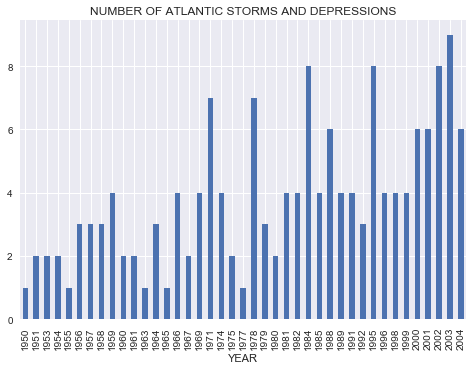

In [605]:
fig1 = df_Atl_auxb.loc[:, 'NUMBER OF ATLANTIC STORMS AND DEPRESSIONS'].\
plot(title = 'NUMBER OF ATLANTIC STORMS AND DEPRESSIONS', kind = 'bar').get_figure()
plt.show()

fig1.savefig('Atl_storms_vs_year.pdf')

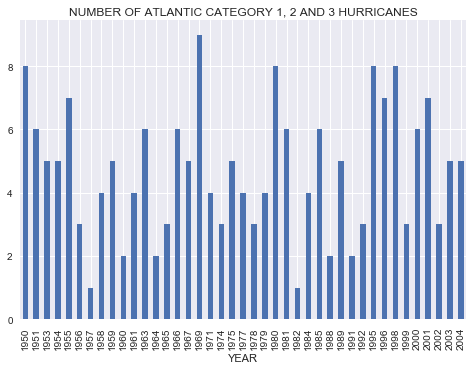

In [606]:
fig2 = df_Atl_auxb.loc[:, 'NUMBER OF ATLANTIC CATEGORY 1, 2 AND 3 HURRICANES'].\
plot(title = 'NUMBER OF ATLANTIC CATEGORY 1, 2 AND 3 HURRICANES', kind = 'bar').get_figure()
plt.show()

fig2.savefig('Atl_hurr123_vs_year.pdf')

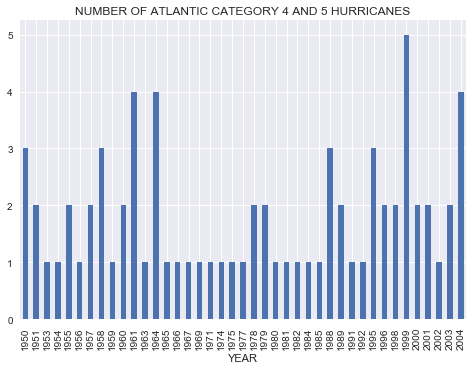

In [607]:
fig3 = df_Atl_auxb.loc[:, 'NUMBER OF ATLANTIC CATEGORY 4 AND 5 HURRICANES'].\
plot(title = 'NUMBER OF ATLANTIC CATEGORY 4 AND 5 HURRICANES', kind = 'bar').get_figure()
plt.show()

fig3.savefig('Atl_hurr45_vs_year.pdf')

The analysis of plots reveals that the number of Atlantic low-pressure systems, that reached the level of a depression or storm, has a tendency to increase on average during the time interval between 1950 and 2004 years. At the same time, the number of hurricanes that reached the level of category 1, 2, or 3 is approximately the same. The average number of the most dangerous hurricanes of 4 and 5 categories is maximal during the last decade preceding 2004.

Next we look at how the number of Pacific storms of different categories depends on year, and try to determine similar tendencies.

In [608]:
df_Pac_aux1 = pd.DataFrame(df_Pac_new[df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'].isin([1, 2])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF PACIFIC STORMS AND DEPRESSIONS'})


df_Pac_aux2 = pd.DataFrame(df_Pac_new[df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'].isin([3, 4, 5])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF PACIFIC CATEGORY 1, 2 AND 3 HURRICANES'})
    
df_Pac_aux3 = pd.DataFrame(df_Pac_new[df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'].isin([6, 7])].groupby('YEAR')\
                                    ['MAXIMUM EFFECTIVE STRENGTH'].count()).reset_index()\
        .rename(columns = {'MAXIMUM EFFECTIVE STRENGTH' : 'NUMBER OF PACIFIC CATEGORY 4 AND 5 HURRICANES'})
    
df_Pac_auxa = pd.merge(df_Pac_aux1, df_Pac_aux2, on = 'YEAR') 
df_Pac_auxb = pd.merge(df_Pac_auxa, df_Pac_aux3, on = 'YEAR')
df_Pac_auxb.index = df_Pac_auxb['YEAR']

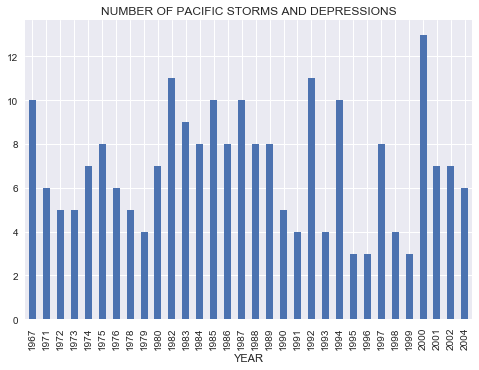

In [609]:
fig4 = df_Pac_auxb.loc[:, 'NUMBER OF PACIFIC STORMS AND DEPRESSIONS'].\
plot(title = 'NUMBER OF PACIFIC STORMS AND DEPRESSIONS', kind = 'bar').get_figure()
plt.show()

fig4.savefig('Pac_storms_vs_year.pdf')

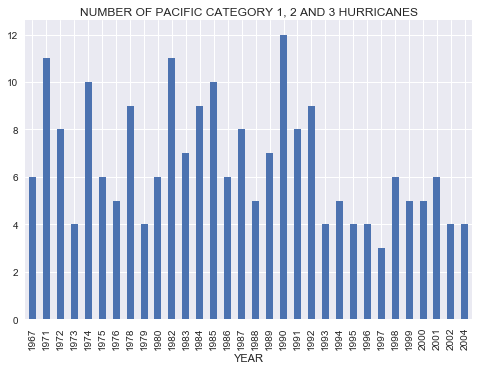

In [610]:
fig5 = df_Pac_auxb.loc[:, 'NUMBER OF PACIFIC CATEGORY 1, 2 AND 3 HURRICANES'].\
plot(title = 'NUMBER OF PACIFIC CATEGORY 1, 2 AND 3 HURRICANES', kind = 'bar').get_figure()
plt.show()

fig5.savefig('Pac_hurr123_vs_year.pdf')

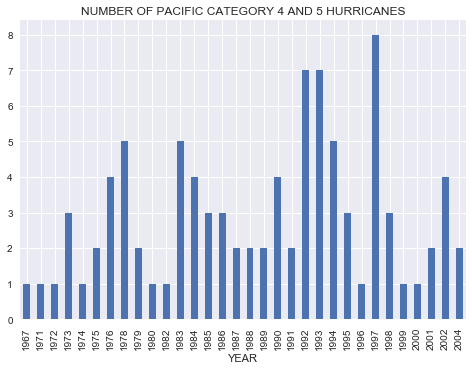

In [611]:
fig6 = df_Pac_auxb.loc[:, 'NUMBER OF PACIFIC CATEGORY 4 AND 5 HURRICANES'].\
plot(title = 'NUMBER OF PACIFIC CATEGORY 4 AND 5 HURRICANES', kind = 'bar').get_figure()
plt.show()

fig6.savefig('Pac_hurr45_vs_year.pdf')

Looking at the plots for the numbers of Pacific low-pressure systems, we come to the conclusion that the numbers of hurricanes of all strengths display large fluctuations from year to year. One can distinguish between the high-frequency hurricane seasons and the low-frequency ones. One can see that the number of category 1,2 or 3 hurricanes was relatively small for all years between 1994 and 2004.

2) Next we look at the column that gives the distance travelled by each hurricane while it is considered dangerous. The descriptions as well as boxplot reveal that the travel distances vary dramatically. The variation range is especially pronounced for Pacific hurricanes. 

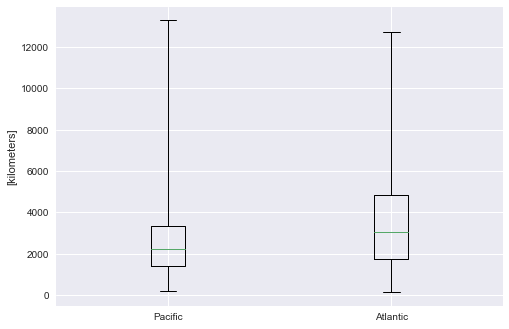

In [612]:
df_Atl_new['DISTANCE TRAVELLED(KM)'].describe()
df_Pac_new['DISTANCE TRAVELLED(KM)'].describe()

fig7 = plt.figure()
plt.boxplot([ df_Pac_new['DISTANCE TRAVELLED(KM)'], df_Atl_new['DISTANCE TRAVELLED(KM)'] ],
            labels = ['Pacific', 'Atlantic'], whis = 'range')

plt.ylabel('[kilometers]')
plt.show()

fig7.savefig('Dist_travelled.pdf')

3) Then we look at the column that gives the total time travelled by each hurricane while it is considered dangerous. The descriptions as well as boxplot reveal that the travel times vary a lot as well, with the variation range being more pronounced for Pacific hurricanes than for Atlantic ones. We should notice also that the range of top 25 percent times and distances is much larger than the range of bottom 75 percent.

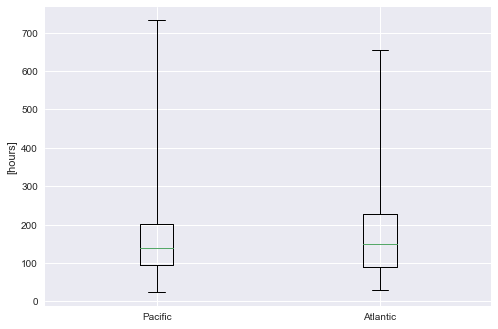

In [613]:
df_Atl_new['TIME TRAVELLED(HRS)'].describe()
df_Pac_new['TIME TRAVELLED(HRS)'].describe()

fig8 = plt.figure()
plt.boxplot([ df_Pac_new['TIME TRAVELLED(HRS)'], df_Atl_new['TIME TRAVELLED(HRS)'] ],
            labels = ['Pacific', 'Atlantic'], whis = 'range')

plt.ylabel('[hours]')
plt.show()

fig8.savefig('Time_travelled.pdf')

4) We then make a box plot of average speeds. We see that the spread of values of speeds for Atlantic hurricanes is much broader than for Pacific ones.

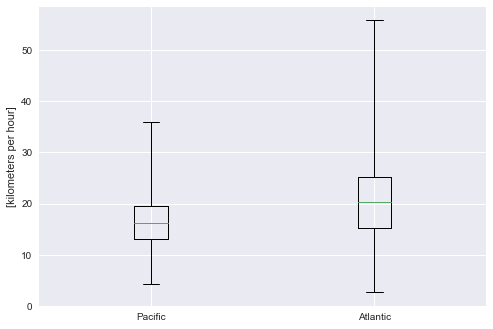

In [614]:
df_Pac_new['AVERAGE SPEED(KMPH)'].describe()
df_Atl_new['AVERAGE SPEED(KMPH)'].describe()

fig9 = plt.figure()
plt.boxplot([ df_Pac_new['AVERAGE SPEED(KMPH)'], df_Atl_new['AVERAGE SPEED(KMPH)'] ],
            labels = ['Pacific', 'Atlantic'], whis = 'range')

plt.ylabel('[kilometers per hour]')
plt.show()

fig9.savefig('average_speed.pdf')

5) Let's make the histograms of the average strengths of hurricanes with respect to the maximum strength. We see that the average strengths of Pacific hurricanes have broader distribution than those of Atlantic ones. While the average strength of Atlantic hurricanes is peaked at around 0.7, the same parameter for Pacific ones is maximal at values of around 0.55.

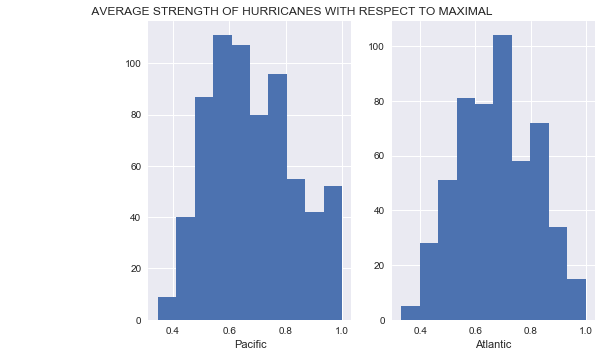

In [615]:
df_Pac_new['AVERAGE STRENGTH WRT MAXIMAL'].describe() 
df_Atl_new['AVERAGE STRENGTH WRT MAXIMAL'].describe()


fff1 = plt.figure()
plt.subplot(1,2,1)
plt.hist(df_Pac_new['AVERAGE STRENGTH WRT MAXIMAL'])
plt.xlabel('Pacific')
plt.title('                         AVERAGE STRENGTH OF HURRICANES WITH RESPECT TO MAXIMAL')

plt.subplot(1,2,2)
plt.hist(df_Atl_new['AVERAGE STRENGTH WRT MAXIMAL'])
plt.xlabel('Atlantic')
plt.show()

fff1.savefig('average_strength.pdf')

6) Here we look at the dependence of maximum effective strength of hurricanes on the distance travelled while being dangerous. We see that the average distance travelled, as well as the spread of distances, has the tendency to increase with increasing maximum strength. This is almost true for both Pacific and Atlantic hurricanes. The minimal distance corresponding  to hurricanes of various strengths increases as well for hurricanes of larger maximum strength.

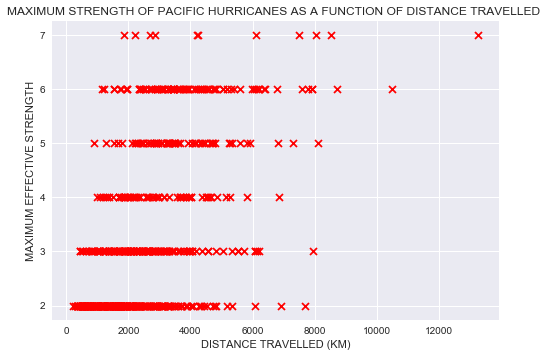

In [616]:
ff2a = plt.figure()

plt.scatter(x = df_Pac_new['DISTANCE TRAVELLED(KM)'], y = df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'x', c = 'r')
plt.xlabel('DISTANCE TRAVELLED (KM)')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAXIMUM STRENGTH OF PACIFIC HURRICANES AS A FUNCTION OF DISTANCE TRAVELLED ')
plt.show()

ff2a.savefig('max_Pac_str_vs_distance.pdf')

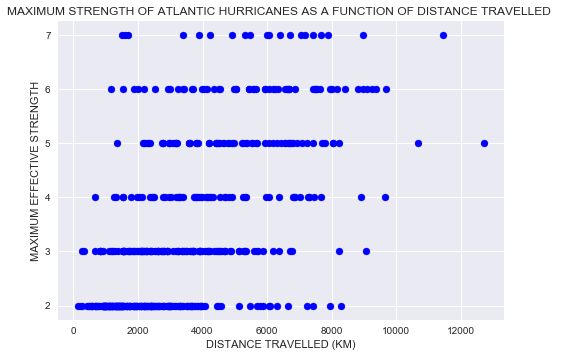

In [617]:
ff2b = plt.figure()

plt.scatter(x = df_Atl_new['DISTANCE TRAVELLED(KM)'], y = df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'o', c = 'b')
plt.xlabel('DISTANCE TRAVELLED (KM)')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAXIMUM STRENGTH OF ATLANTIC HURRICANES AS A FUNCTION OF DISTANCE TRAVELLED ')
plt.show()

ff2b.savefig('max_Atl_str_vs_distance.pdf')

7) We then look at the dependence of the maximum effective strength of hurricanes on the time travelled while being dangerous. The dependence here is similar to that for the maximum strength vs distance travelled. The minimal and average times travelled by hurricanes have the tendency to increase with increasing value of the maximum strength.

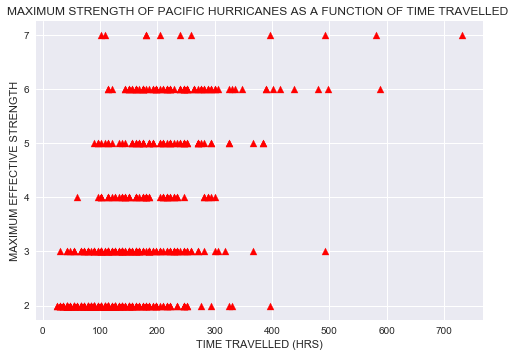

In [618]:
ff3a = plt.figure()

plt.scatter(x = df_Pac_new['TIME TRAVELLED(HRS)'], y = df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'], marker = '^', c = 'r')
plt.xlabel('TIME TRAVELLED (HRS)')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAXIMUM STRENGTH OF PACIFIC HURRICANES AS A FUNCTION OF TIME TRAVELLED ')
plt.show()

ff3a.savefig('max_Pac_str_vs_time.pdf')

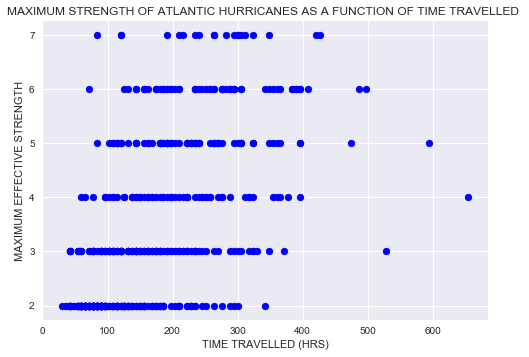

In [619]:
ff3b = plt.figure()

plt.scatter(x = df_Atl_new['TIME TRAVELLED(HRS)'], y = df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'o', c = 'b')
plt.xlabel('TIME TRAVELLED (HRS)')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAXIMUM STRENGTH OF ATLANTIC HURRICANES AS A FUNCTION OF TIME TRAVELLED ')
plt.show()

ff3b.savefig('max_Atl_str_vs_time.pdf')

8) Finally, we look at the dependence of the maximum strength of hurricanes on the latitude and longitude when they first became dangerous. The tendency that we observe for both Pacific and Atlantic hurricanes is very interesting. The larger the maximal strength of a hurricane is, the smaller the range of latitudes and longitudes where the hurricane is more likely to form. 

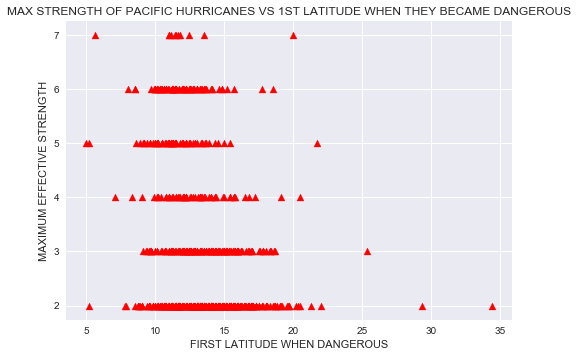

In [620]:
ff4a = plt.figure()

plt.scatter(x = df_Pac_new['FIRST LAT'], y = df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'], marker = '^', c = 'r')
plt.xlabel('FIRST LATITUDE WHEN DANGEROUS')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAX STRENGTH OF PACIFIC HURRICANES VS 1ST LATITUDE WHEN THEY BECAME DANGEROUS')
plt.show()

ff4a.savefig('max_Pac_str_vs_first_lat.pdf')

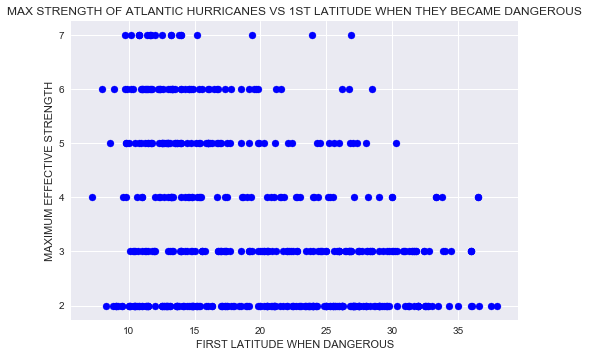

In [621]:
ff4b = plt.figure()

plt.scatter(x = df_Atl_new['FIRST LAT'], y = df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'o', c = 'b')
plt.xlabel('FIRST LATITUDE WHEN DANGEROUS')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAX STRENGTH OF ATLANTIC HURRICANES VS 1ST LATITUDE WHEN THEY BECAME DANGEROUS')
plt.show()

ff4b.savefig('max_Atl_str_vs_first_lat.pdf')

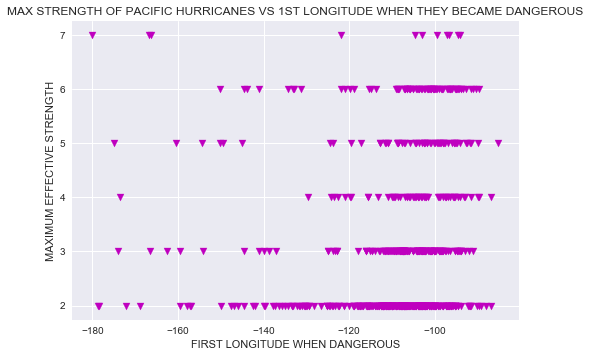

In [622]:
ff4c = plt.figure()

plt.scatter(x = df_Pac_new['FIRST LONG'], y = df_Pac_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'v', c = 'm')
plt.xlabel('FIRST LONGITUDE WHEN DANGEROUS')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAX STRENGTH OF PACIFIC HURRICANES VS 1ST LONGITUDE WHEN THEY BECAME DANGEROUS')
plt.show()

ff4c.savefig('max_Pac_str_vs_first_long.pdf')

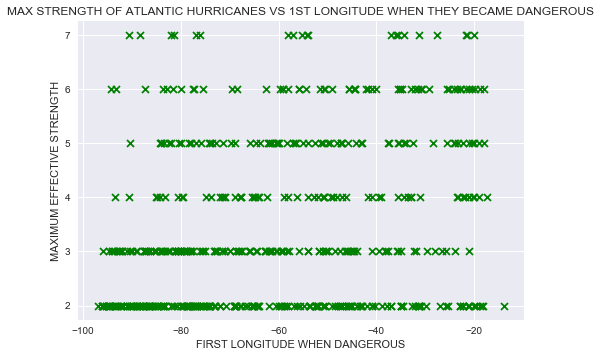

In [623]:
ff4d = plt.figure()

plt.scatter(x = df_Atl_new['FIRST LONG'], y = df_Atl_new['MAXIMUM EFFECTIVE STRENGTH'], marker = 'x', c = 'g')
plt.xlabel('FIRST LONGITUDE WHEN DANGEROUS')
plt.ylabel('MAXIMUM EFFECTIVE STRENGTH')
plt.title('MAX STRENGTH OF ATLANTIC HURRICANES VS 1ST LONGITUDE WHEN THEY BECAME DANGEROUS')
plt.show()

ff4c.savefig('max_Atl_str_vs_first_long.pdf')

9) Finally we will try to merge the hurricane and emergency dataframes, based on the 'NAME' and 'YEAR' columns. The resultant dataframes become too small, however. Merging with Pacific hurricanes dataframe gives only 3 rows, while merging with Atlantic hurricanes one leads to a combined dataframe of only 47 rows. Thus this merged dataframe will be hardly useful for making predictions.  

In [624]:
#df_merge = pd.merge(df_Pac_new, df_emerg_new, on = ['YEAR', 'NAME'], how = 'inner')
df_merge = pd.merge(df_Atl_new, df_emerg_new, on = ['YEAR', 'NAME'], how = 'inner')

df_merge.info()
#df_merge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 13 columns):
YEAR                            47 non-null int64
NAME                            47 non-null object
FIRST LONG                      47 non-null float64
FIRST LAT                       47 non-null float64
LAST LONG                       47 non-null float64
LAST LAT                        47 non-null float64
DISTANCE TRAVELLED(KM)          47 non-null float64
TIME TRAVELLED(HRS)             47 non-null int64
AVERAGE WIND STRENGTH(KMPH)     47 non-null float64
MAXIMUM EFFECTIVE STRENGTH      47 non-null int64
AVERAGE STRENGTH WRT MAXIMAL    47 non-null float64
AVERAGE SPEED(KMPH)             47 non-null float64
NUMBER OF COUNTIES              47 non-null int64
dtypes: float64(8), int64(4), object(1)
memory usage: 5.1+ KB


In [625]:
#from pygeocoder import Geocoder
#from pygeolib import GeocoderError

In [626]:
#try:
#    g = Geocoder.reverse_geocode(30.1, -94.2)
#    print(g.country)
#except GeocoderError:
#    print('In the ocean')


In [627]:
#df_merge['STRENGTH AT LANDING'] = 0

#for k in range(len(df_merge.index)):
#    name = df_merge.loc[k, 'NAME']
#    year = df_merge.loc[k, 'YEAR']


#    i = 0
#    location = ''
#    dfm  = 0
#    while True:
#        aux_long = df_Atl[(df_Atl['YEAR'] == year) & (df_Atl['NAME'] == name )]['LONG'].iloc[i]
#        aux_lat = df_Atl[(df_Atl['YEAR'] == year) & (df_Atl['NAME'] == name )]['LAT'].iloc[i]
#        try:
#            g = Geocoder.reverse_geocode(aux_lat, aux_long)
#            location = g.country
            #print(location)
#        except GeocoderError:
#           location = 'In the ocean'
            #print(location)

#        if  ( (location == 'United States') or \
#             ( i == len(df_Atl[(df_Atl['YEAR'] == year) & (df_Atl['NAME'] == name )]['LONG'].index)-1 ) ):
#            break
        
            
#        dfm = df_Atl[(df_Atl['YEAR'] == year) & (df_Atl['NAME'] == name )]['EFFECTIVE STRENGTH'].iloc[i]
#        i +=1
    
#    df_merge.loc[k, 'STRENGTH AT LANDING'] = dfm
    #print(dfm)
    